# Ordinære differensialligninger

## Eksponensiell vekst

Ser på differensialligningen
$$
r'(t) = a r(t), \quad r(0) = r_0
$$
Med $t_n = n\Delta t$, $\Delta t = T/N$ blir eksplisitt skjema
$$
\frac{r_{n+1} - r_n}{\Delta t} = a r_n \quad\Rightarrow\quad r_n = (1 + a \Delta t)^n r_0
$$
Bruker $T = 1$, $N = 100$, $r_0 = 2$ og $a = $

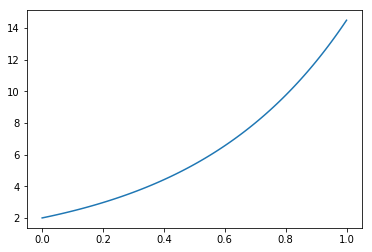

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100 # antall steg
T = 1   # tidsintervall
r_0 = 2 # initialverdi
a = 2   # vekstrate

delta_t = T / N
n_verdier = np.arange(N + 1)
t_verdier = delta_t * n_verdier
r_verdier_ekspl = (1 + a * delta_t)**n_verdier * r_0

plt.plot(t_verdier, r_verdier_ekspl)

Implisitt skjema
$$
\frac{r_{n+1} - r_n}{\Delta t} = a r_{n+1} \quad\Rightarrow\quad r_n = \frac{r_0}{(1 - a \Delta t)^n}
$$

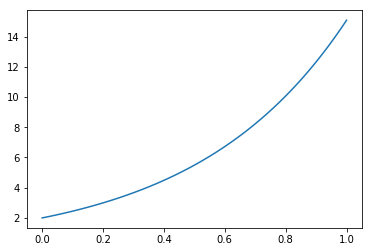

In [2]:
r_verdier_impl = r_0 / (1 - a * delta_t)**n_verdier

plt.plot(t_verdier, r_verdier_impl)

# Logistisk vekst

Begrenset kapasitet $R$
$$
r'(t) = a r(t) (1 - r(t)/R), \quad r(0) = r_0
$$
Eksplisitt skjema
$$
\begin{aligned}
\frac{r_{n+1} - r_n}{\Delta t} &= a r_n (1 - r_n/r) \\
\Rightarrow\quad r_{n+1} &= r_n + \Delta t a r_n(1 - r_n/R)
\end{aligned}
$$

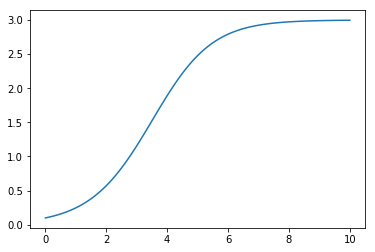

In [3]:
N = 100 # antall steg
T = 10   # tidsintervall
r_0 = .1 # initialverdi
a = 1   # vekstrate
R = 3  # kapasitet

delta_t = T / N
n_verdier = np.arange(N + 1)
t_verdier = delta_t * n_verdier
r_verdier_ekspl = np.zeros(N + 1)
r_verdier_ekspl[0] = r_0  # initialverdi
for i in range(N):
    r_verdier_ekspl[i + 1] = r_verdier_ekspl[i] + delta_t * r_verdier_ekspl[i] * (1 - r_verdier_ekspl[i] / R)

plt.plot(t_verdier, r_verdier_ekspl)

Implisitt skjema
$$
\begin{aligned}
\frac{r_{n+1} - r_n}{\Delta t} &= a r_{n+1} (1 - r_{n+1}/r) \\
\Rightarrow\quad r_{n+1} &= \frac{a\Delta t - 1 \pm \sqrt{(1 - a\Delta t)^2 + 4 a \Delta t / R}}{2 a \Delta t / R}
\end{aligned}
$$

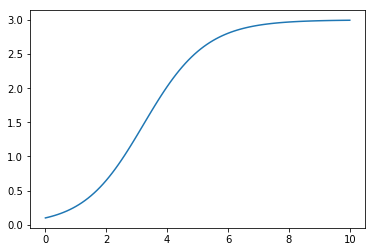

In [4]:
r_verdier_impl = np.zeros(N + 1)
r_verdier_impl[0] = r_0  # initialverdi
for i in range(N):
    r_verdier_impl[i + 1] = (a * delta_t - 1 + np.sqrt((1 - a * delta_t)**2 +
                                                        4 * a * delta_t * r_verdier_impl[i]/ R)) / \
        (2 * a * delta_t / R)

plt.plot(t_verdier, r_verdier_impl)

## Generell løsning

Generell ODE av første orden
$$
y'(t) = f(y), y(t_0) = y_0
$$
Eksplisitt skjema
$$
\begin{aligned}
\frac{y_{n + 1} - y_n}{\Delta t} &= f(y_n) \\
\Rightarrow\quad y_{n+1} &= y_n + \Delta t f(y_n)
\end{aligned}
$$
Implementer i modulen `ode`.

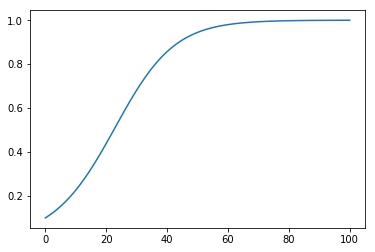

In [7]:
import ode

def f(y):
    """
    Normalisert variant av logistisk vekst
    """
    return y * (1 - y)


t = np.linspace(0, 10, 101)
y_ekspl = ode.eksplisitt(f, 100, 0, 10, .1)
plt.plot(y_ekspl)

Heun-skjema
$$
\begin{aligned}
\frac{y_{n+1} - y_n}{\Delta t} &= \frac12 (f(y_n) + f(y_n + \Delta t f(y_n))) \\
\Rightarrow \quad y_{n+1} &= y_n + \frac{\Delta t}2 (f(y_n) + f(y_n + \Delta t f(y_n)))
\end{aligned}
$$
Også implementert i modulen `ode`.

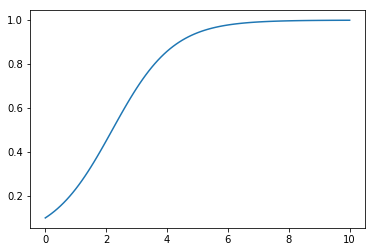

In [14]:
y_heun = ode.heun(f, 100, 0, 10, .1)
plt.plot(t, y_heun)

## scipy

Og så er det hele innebygget i pakken `scipy`...

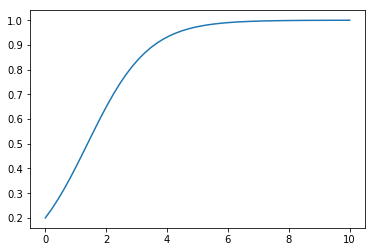

In [18]:
from scipy.integrate import odeint

def f(y, t): # må ha to parametre for odeint
    return y * (1 - y)

t = np.linspace(0, 10)
y = odeint(f, .2, t)

plt.plot(t, y)